In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

- Pada bagian import merupakan yang akan digunakan untuk pengolahan data dan visual yang akan ditampilkan.
- kemudian pada bagian from sendiri sebagai penambahan, yaitu :
1. bagian train_test_split dan MinMaxScaler digunakan sebagai pembagi data & normalisasi fitur
2. Sequential dan Dense dari tensorflow.keras sebagai pembangun neural network Sequential
3. menambahkan LinearRegression dan nilai r2 guna membangun nilai model regresi linear dan menghintung metrik evaluasi R-squered


In [ ]:
df = pd.read_csv('/content/car_purchasing.csv', encoding='ISO-8859-1')
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


baris pertama digunakan sebagai input data serta membaca file CSV kemudian di simpan ke dalam objek DataFrame Pandas df
baris kedua menampilkan 5 baris teratas dari DataFrame df untuk melihat sebagian data yang telah dibaca.

In [ ]:
df.drop(columns=['customer name', 'customer e-mail', 'country', 'gender'], inplace=True)

pada baris ini digunakan secara permanen menghapus 4 kolom, yaitu 'customer name', 'customer e-mail', 'country', dan 'gender' dari DataFrame df. Dilakukan karena 4 kolom tersebut tidak begitu penting, guna meringkas tampilan

In [ ]:
df.head()

,age,annual Salary,credit card debt,net worth,car purchase amount
0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


sama seperti source code kedua barus ini digunakan untuk menampilkan 5 baris teratas

In [ ]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  500 non-null    float64
 1   annual Salary        500 non-null    float64
 2   credit card debt     500 non-null    float64
 3   net worth            500 non-null    float64
 4   car purchase amount  500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

pada baris pertama dgunakan untuk menampilkan informasi ringkas tentang objek DataFrame df, seperti jumlah baris, jumlah kolom, tipe data masing-masing kolom, dan penggunaan memori.
pada baris kedua Menghitung jumlah nilai yang hilang (NaN/null) pada setiap kolom di df dan menampilkannya dalam bentuk seri Pandas.
secara keseluruhan digunakan untuk memeriksa overview data pada DataFrame, yaitu struktur data (info) dan keberadaan nilai yang hilang (isna & sum).

Text(0.5, 1.0, 'the corr between credit card debt and annual Salary')

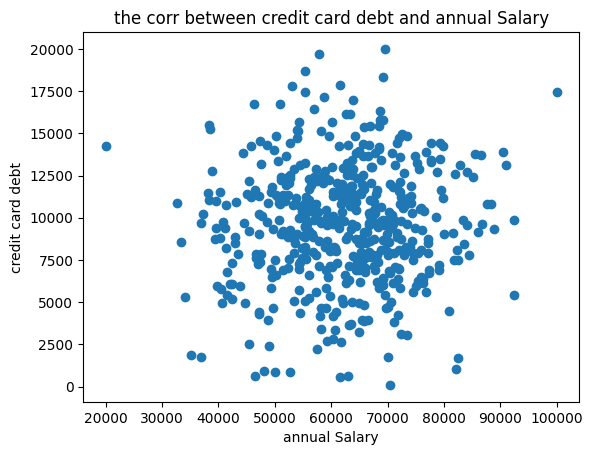

In [ ]:
plt.scatter(df['annual Salary'] , df['credit card debt'])
plt.xlabel('annual Salary')
plt.ylabel('credit card debt')
plt.title('the corr between credit card debt and annual Salary')

pada baris ini secara keseluruhan digunakan untuk membuat scatter plot untuk memvisualisasikan hubungan antara kolom 'annual Salary' dan 'credit card debt' dalam DataFrame df:
- pada baris pertama = Membuat scatter plot dengan 'annual Salary' pada sumbu x dan 'credit card debt' pada sumbu y.
- baris 2 dan 3 = Memberi label pada sumbu x dan y.
- baris 4 = Memberi judul pada plot yang menunjukkan visualisasi korelasi antara 'credit card debt' dan 'annual Salary'.
Jadi secara keseluruhan digunakan untuk memvisualisasikan korelasi antara gaji tahunan dan hutang kartu kredit dalam bentuk scatter plot agar lebih mudah dianalisis secara visual.

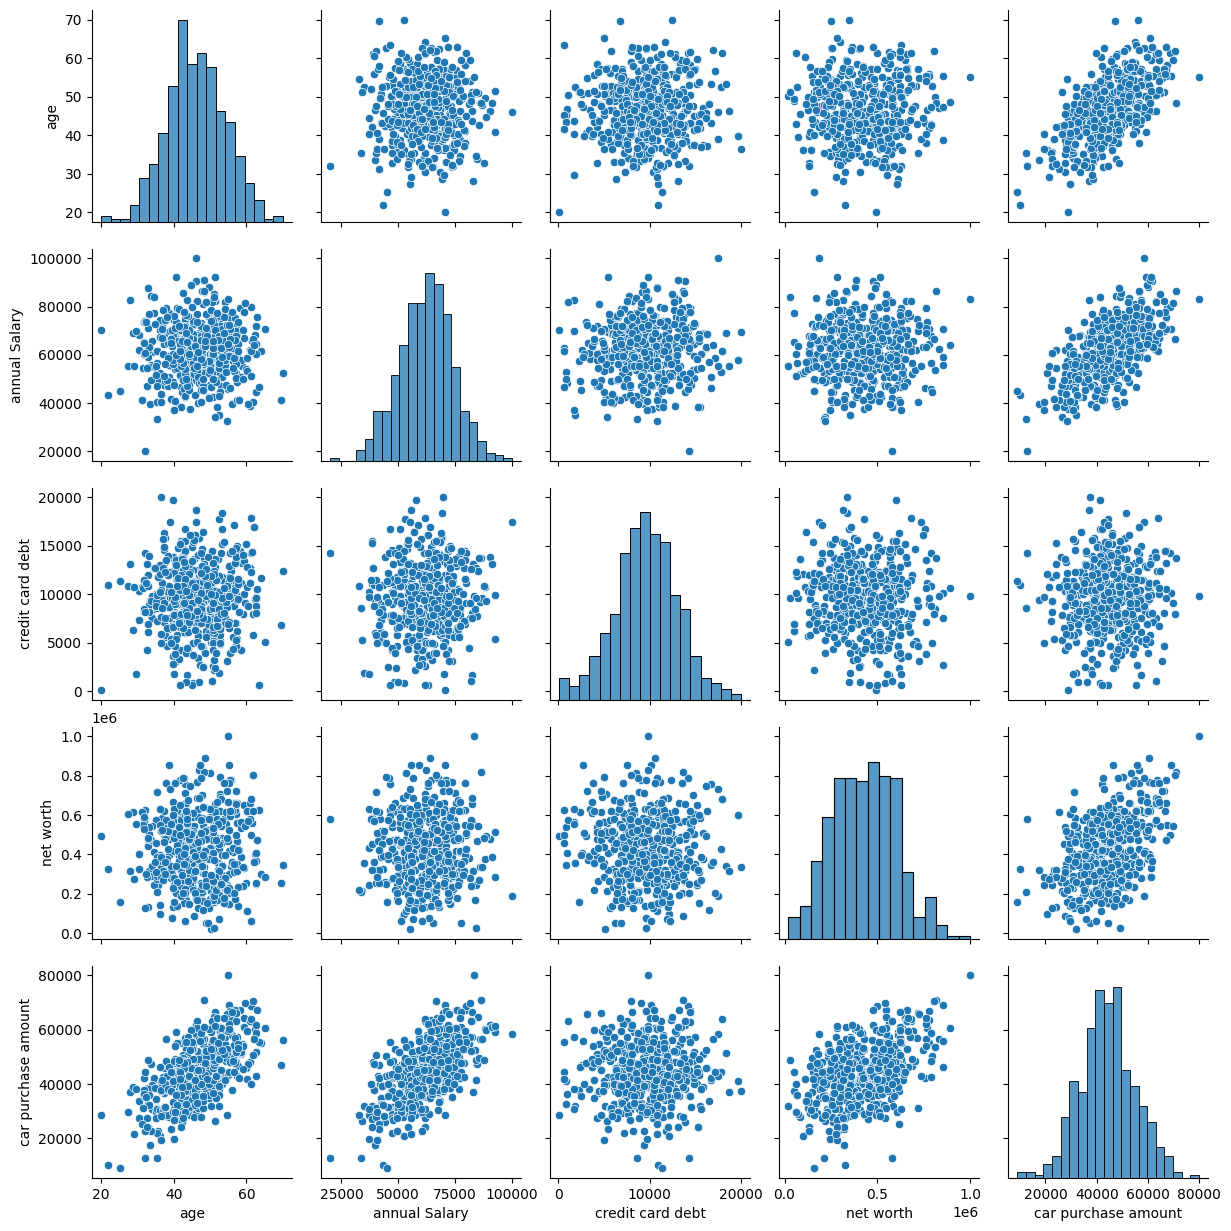

In [ ]:
sns.pairplot(df)

baris ini digunakan untuk membuat scatter plot matriks guna memvisualisasikan korelasi antar setiap pasangan fitur/kolom dalam DataFrame df secara visual.

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

baris pertama membuat array NumPy X yang berisi semua baris dan semua kolom kecuali kolom terakhir dari df.
baris kedua membuat seri Pandas y yang berisi semua baris dari kolom terakhir pada df.
Jadi fungsi baris ini  memisahkan data menjadi fitur X (semua kolom kecuali kolom target) dan label y (kolom target) yang biasanya diperlukan untuk membangun model machine learning seperti regresi atau klasifikasi.

In [ ]:
scale = MinMaxScaler()
X = scale.fit_transform(X)
y = scale.fit_transform(y.values.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

pada baris ini melakukan normalisasi fitur dan label menggunakan MinMaxScaler, kemudian membagi data menjadi data latih dan data uji dengan rasio 80:20, yang merupakan langkah persiapan data penting sebelum membangun model machine learning.

In [ ]:
#Trying linear regression
lreg = LinearRegression()
lreg.fit(X_train, y_train)
print('Train score', lreg.score(X_train, y_train))
print('Test score', lreg.score(X_test, y_test))

Train score 0.9999999816867121
Test score 0.9999999793318247


pada bagian ini terdapat beberapa point, yaitu
1. Membuat model regresi linear
2. Melatih model dengan data latih
3. Mengevaluasi performa model pada data latih dan data uji menggunakan metrik R^2
Skor R^2 mengukur seberapa baik model dapat menjelaskan variasi dalam data. Semakin dekat dengan 1, semakin baik model memodelkan data. Membandingkan skor latih dan uji membantu mendeteksi overfitting.

In [ ]:
y_pred = lreg.predict(X_test)

di bagian ini menggunakan model regresi linear yang telah dilatih sebelumnya untuk memprediksi nilai label pada data uji X_test. Hasil prediksi disimpan dalam variabel y_pred yang dapat digunakan untuk evaluasi lebih lanjut atau analisis lain.

In [ ]:
ann = Sequential([Dense(32, activation="relu"),
                 Dense(1, activation='linear')])

ann.compile(optimizer='adam',
            loss='mean_squared_error',
            metrics=['mean_absolute_error'])


history = ann.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
10/10 [==============================] - 2s 59ms/step - loss: 0.1541 - mean_absolute_error: 0.3666 - val_loss: 0.1072 - val_mean_absolute_error: 0.2983
Epoch 2/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0757 - mean_absolute_error: 0.2468 - val_loss: 0.0476 - val_mean_absolute_error: 0.1853
Epoch 3/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0310 - mean_absolute_error: 0.1454 - val_loss: 0.0196 - val_mean_absolute_error: 0.1113
Epoch 4/50
10/10 [==============================] - 0s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0939 - val_loss: 0.0135 - val_mean_absolute_error: 0.0926
Epoch 5/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0112 - mean_absolute_error: 0.0831 - val_loss: 0.0133 - val_mean_absolute_error: 0.0929
Epoch 6/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0107 - mean_absolute_error: 0.0816 - val_loss: 0.0121 - val_mean_absolute_error: 0.0883
Epoch 7/50
10/10 [=========

dalam baris yang ditampilkan
1. Membangun model neural network sederhana dengan 1 hidden layer (32 neuron) dan 1 output layer untuk tugas regresi.
2. Mengkompilasi model dengan optimizer Adam, loss MSE, dan metrik evaluasi MAE.
3. Melatih model pada data latih (X_train, y_train) selama 50 epoch, dengan 20% data validasi.
4. Menyimpan hasil pelatihan dalam variabel history.
Jadi ini merupakan langkah membangun dan melatih model neural network sederhana menggunakan TensorFlow/Keras untuk tugas regresi.

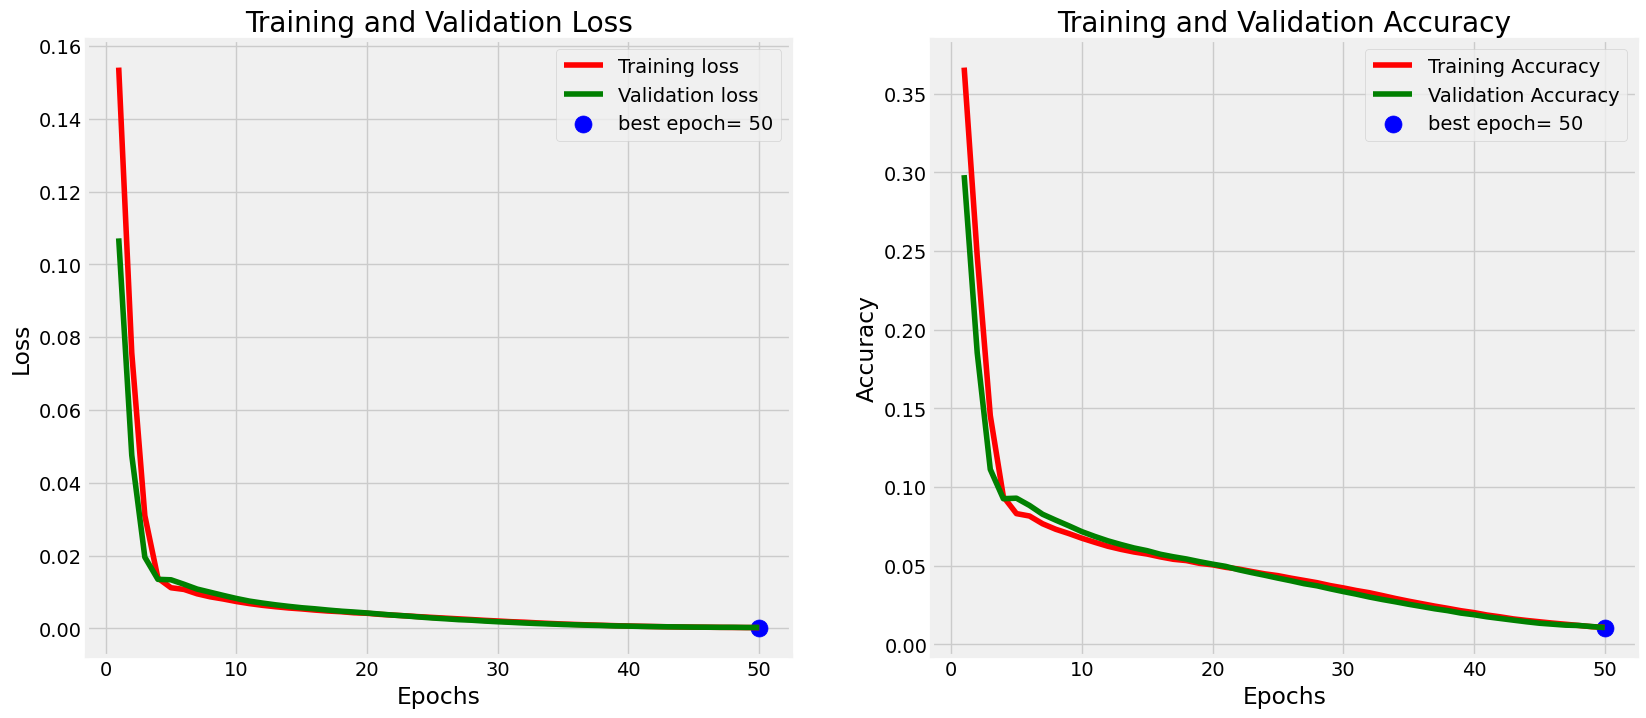

In [ ]:
tr_acc = history.history['mean_absolute_error']
tr_loss = history.history['loss']
val_acc = history.history['val_mean_absolute_error']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmin(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

pada baris yang sangat banyak ini membuat plot untuk loss dan akurasi dari model machine learning selama proses pelatihan. Data loss dan akurasi diambil dari objek history yang biasanya dihasilkan saat melatih model.

Kode membuat dua subplot, yang pertama untuk memplot grafik loss pelatihan vs validasi, dan yang kedua untuk memplot grafik akurasi pelatihan vs validasi.

Pada masing-masing subplot, titik dengan loss/akurasi validasi terbaik (epoch terendah) ditandai dengan titik biru besar dan label epoch terbaik.

Sumbu x merupakan epoch, sumbu y adalah nilai loss/akurasi. Garis merah adalah data pelatihan, garis hijau adalah data validasi.

Pada akhir kode, plot ditampilkan menggunakan plt.show().

In [ ]:
ann_y_pred = ann.predict(X_test)

4/4 [==============================] - 0s 4ms/step


berfungsi guna melakukan prediksi menggunakan model ANN yang sudah dilatih sebelumnya pada data uji X_test, dan menyimpan hasilnya ke dalam variabel ann_y_pred.

In [ ]:
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)

R2 score: 0.9999999793318247


menghitung R2 score antara nilai aktual dan prediksi, kemudian print mencetak nilainya.

In [ ]:
ann.evaluate(X_test, y_test)

4/4 [==============================] - 0s 7ms/step - loss: 2.7160e-04 - mean_absolute_error: 0.0121


[0.0002715983137022704, 0.012052606791257858]

Digunakan untuk mengevaluasi performa model Artificial Neural Network (ANN) pada data uji (test data).
Ketika dijalankan, model ANN akan menggunakan X_test untuk memprediksi output, lalu membandingkan prediksi tersebut dengan y_test (nilai sebenarnya). Metrik evaluasi seperti loss dan akurasi akan dihitung dan ditampilkan.

In [ ]:
ann.predict([[40, 70000.500, 9550,534000]])

1/1 [==============================] - 0s 73ms/step


array([[97774.195]], dtype=float32)

digunakan untuk memprediksi output dari model Artificial Neural Network (ANN) dengan memasukkan data input baru. baris tersebut tersebut akan memasukkan data input baru [40, 70000.500, 9550, 534000] ke dalam model ANN yang sudah dilatih, dan mengembalikan output prediksi untuk input tersebut.

Output prediksi ini dapat disimpan ke dalam variabel untuk digunakan lebih lanjut, seperti melakukan klasifikasi, analisis, atau visualisasi.

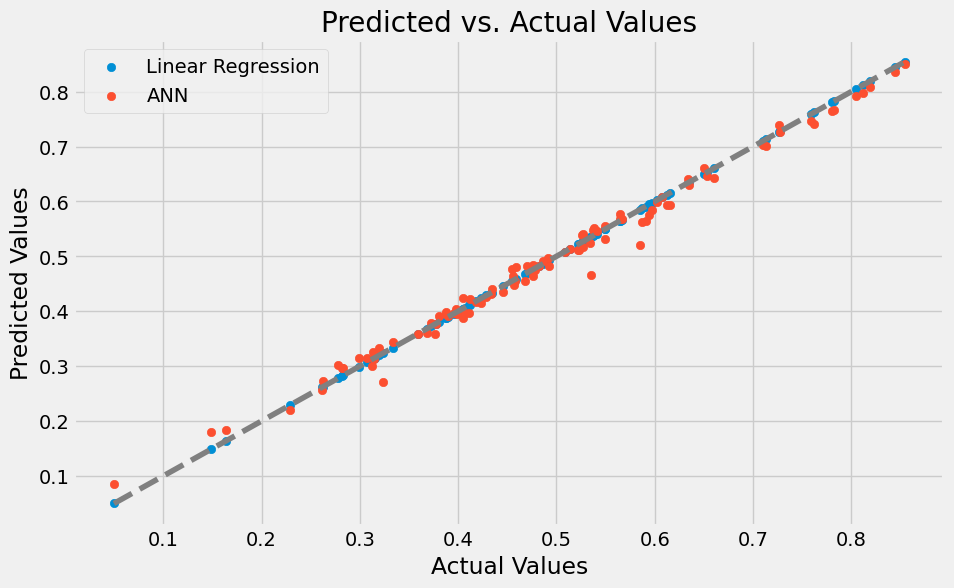

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label='Linear Regression')
plt.scatter(y_test, ann_y_pred, label='ANN')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.show()

membuat plot scatter untuk memvisualisasikan perbandingan antara nilai sebenarnya (actual values) dan nilai prediksi dari dua model, yaitu Linear Regression dan Artificial Neural Network (ANN).
Dengan plot ini, kita dapat membandingkan secara visual seberapa dekat nilai prediksi dari kedua model dengan nilai sebenarnya.